# New York City AirBnB Data Modeling and Analysis

Made for the University of San Diego
Course: AAI-510 (Machine learning: Fundamentals and Applications)
Professor: Wesley Pasfield, MS

By - Doug Code (dcode15), Subhabrata Ganguli (suvoganguli), Jeffrey Lehrer (J-Lehrer)

# Problem statement and justification for the proposed approach.


Business understanding - What does the business need?




## [Modify as necessary]

## Introduction

Airbnb, an online marketplace for lodging, has transformed the way people travel and find accommodations. In major cities like New York City, Airbnb listings provide a wide variety of options for travelers, ranging from entire apartments and homes to private rooms in shared apartments. This flexibility has made Airbnb a popular choice among both tourists and business travelers.

In this notebook, we will explore the Airbnb dataset for New York City. This dataset provides detailed information on listings available on Airbnb, including prices, locations, types of properties, and reviews. By analyzing this data, we can gain insights into the rental market in New York City, understand pricing strategies, identify popular neighborhoods, and much more.

## Dataset Description

The dataset used in this analysis is obtained from [Inside Airbnb](http://insideairbnb.com/get-the-data.html), a website that provides publicly available data on Airbnb listings. 

## Objectives

In this analysis, the business needs are to achieve the following objectives:

1. **Data Exploration**: Understand the structure and contents of the dataset through summary statistics and visualizations.
2. **Price Analysis**: Analyze the pricing strategies of different types of listings and identify factors influencing prices.
3. **Geographical Analysis**: Examine the geographical distribution of listings and identify popular neighborhoods.
4. **Regression Analysis**: Predict the price of listing based on the test data


# Data preparation.


Data preparation - How do we organize the data for modeling?


In [4]:
from typing import List

import optuna
import pandas as pd
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.impute import SimpleImputer
import sys
import os

# Add path to src
# current_dir = os.getcwd()
# src_path = os.path.join(current_dir, 'src')
# sys.path.append(src_path)

from preprocessing.ColumnEncoder import ColumnEncoder
from evaluation.ModelEvaluator import ModelEvaluator
from preprocessing.ColumnEncoder import ColumnEncoder
from preprocessing.ColumnSelector import ColumnSelector
from preprocessing.DataCleaner import DataCleaner
from preprocessing.DataImputer import DataImputer
from tuners.HistGradientBoostingRegressorTuner import HistGradientBoostingRegressorTuner

# Feature engineering – data pre-processing – missing values, outliers, etc.


In [8]:
print("Preprocessing data.")
data_path: str = "../data/listings-full.csv"

data: pd.DataFrame = pd.read_csv(data_path)
data = DataCleaner.perform_base_cleaning(data)
data = DataImputer.remove_outliers_iqr(data, ["price"])

train_data, val_data, test_data = DataCleaner.split_train_val_test(data)

train_data = ColumnEncoder.mean_encode_columns(train_data, ColumnSelector.get_categorical_features(train_data), "price")
val_data = ColumnEncoder.mean_encode_columns(val_data, ColumnSelector.get_categorical_features(val_data), "price")
test_data = ColumnEncoder.mean_encode_columns(test_data, ColumnSelector.get_categorical_features(test_data), "price")

train_data = DataImputer.impute_missing_values(train_data, data.columns, SimpleImputer(strategy="median"))
val_data = DataImputer.impute_missing_values(val_data, data.columns, SimpleImputer(strategy="median"))

x_train, y_train, x_val, y_val, x_test, y_test = DataCleaner.perform_x_y_split(train_data, val_data, test_data)


Preprocessing data.


/Users/suvo/Documents/MS-USD/AAI510-Machine Learning/AAI510_FinalProject/src/preprocessing/DataCleaner.py:20: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_copy["price"] = data_copy["price"].str.replace("$", "").str.replace(",", "").astype(float)


# Data understanding (EDA) – a graphical and non-graphical representation of relationships between the response variable and predictor variables.


Data understanding - What data do we have/need? Is it clean?


In [19]:
# Read data

df = pd.read_csv("../data/listings-full.csv")
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6713005,https://www.airbnb.com/rooms/6713005,20240503175146,2024-05-04,previous scrape,Large one bedroom,You'll share an apartment with two wonderful y...,NaN,https://a0.muscache.com/pictures/84725702/12f8...,35144920,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,922527181364298444,https://www.airbnb.com/rooms/922527181364298444,20240503175146,2024-05-03,city scrape,New Flushing Modern Apartment,This unique place has a style all its own.,NaN,https://a0.muscache.com/pictures/f5d74ed9-0b15...,420975523,...,5.00,4.45,5.00,NaN,t,3,3,0,0,1.10
2,794696802406920855,https://www.airbnb.com/rooms/794696802406920855,20240503175146,2024-05-04,previous scrape,Lovely studio in Hell's Kitchen!,Amazing location in the heart of Hell’s Kitche...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,43305568,...,5.00,4.91,4.91,NaN,f,1,1,0,0,0.69
3,54294086,https://www.airbnb.com/rooms/54294086,20240503175146,2024-05-03,city scrape,Luxury 1- bedroom rental unit with Hot tub,Relax with the whole family at this peaceful p...,NaN,https://a0.muscache.com/pictures/9613630a-19c4...,440355290,...,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN
4,1039262508734112133,https://www.airbnb.com/rooms/1039262508734112133,20240503175146,2024-05-04,city scrape,Private room close to LGA,We are located 8 minutes from la guardia airpo...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,430854617,...,4.74,4.58,4.63,Exempt,t,3,0,3,0,3.77


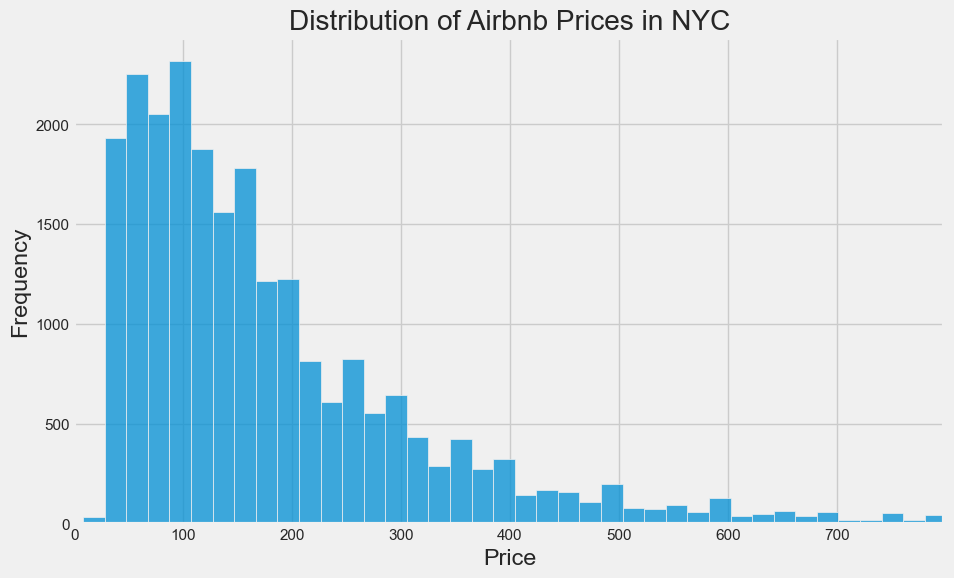

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

df['price'] = df['price'].str.replace('$', '', regex=False).replace('None', None).replace('', None)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Set styles for the plots
sns.set(style="whitegrid")
plt.style.use("fivethirtyeight")

# Histogram for price
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=False)
plt.title('Distribution of Airbnb Prices in NYC')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, df['price'].quantile(0.99))  # To limit the x-axis to the 99th percentile to avoid extreme outliers
plt.show()

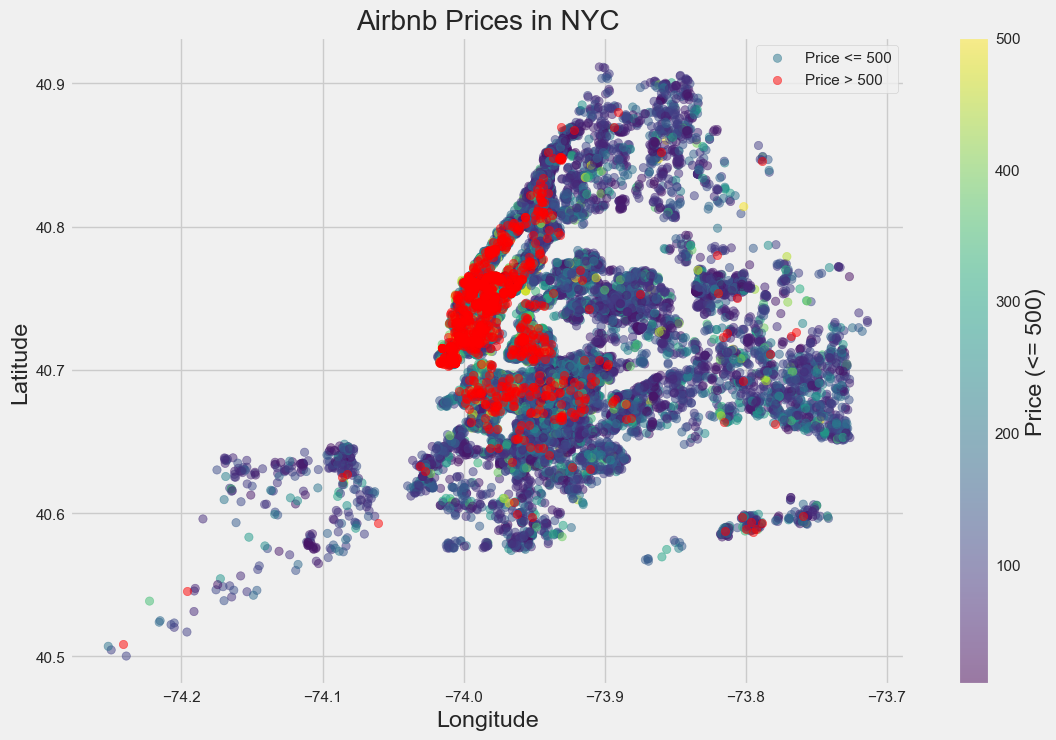

In [26]:
# Split the data into two groups
df_below_500 = df[df['price'] <= 500]
df_above_500 = df[df['price'] > 500]

# Plot the data
plt.figure(figsize=(12, 8))

# Scatter plot for prices <= 500
sc = plt.scatter(df_below_500['longitude'], df_below_500['latitude'], c=df_below_500['price'], cmap='viridis', alpha=0.5, label='Price <= 500')

# Scatter plot for prices > 1000
plt.scatter(df_above_500['longitude'], df_above_500['latitude'], color='red', alpha=0.5, label='Price > 500')

# Add color bar for the price <= 1000 points
cbar = plt.colorbar(sc, label='Price (<= 500)')

# Add titles and labels
plt.title('Airbnb Prices in NYC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

/var/folders/d7/3y4pn1x55_583bts49jyqlxh0000gn/T/ipykernel_88290/755991337.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


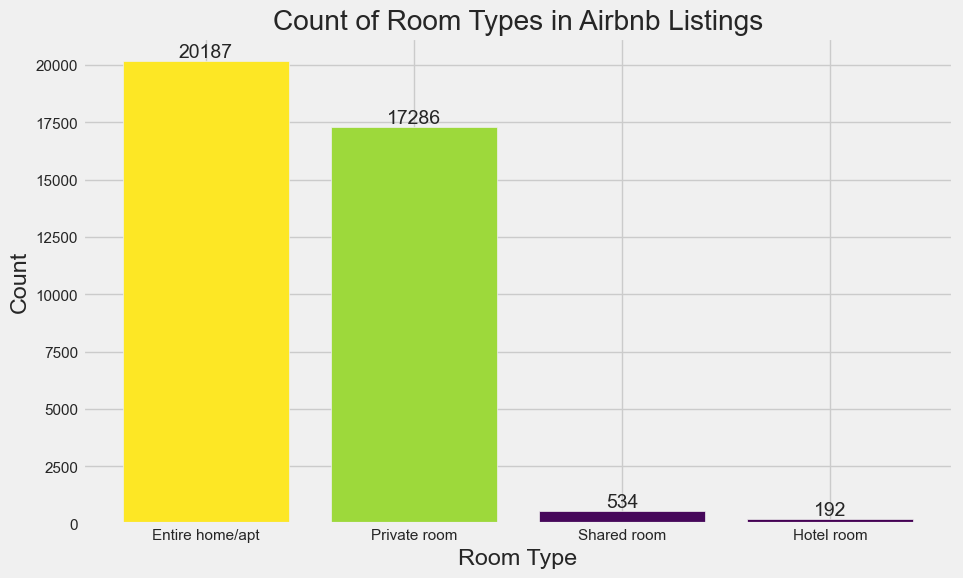

In [27]:
import matplotlib.cm as cm

# Count the occurrences of each room type
room_type_counts = df['room_type'].value_counts()

# Get the viridis colormap
cmap = cm.get_cmap('viridis')

# Normalize the color range
norm = plt.Normalize(room_type_counts.min(), room_type_counts.max())
colors = cmap(norm(room_type_counts.values))

# Plot the counts
plt.figure(figsize=(10, 6))
plt.bar(room_type_counts.index, room_type_counts.values, color=colors)

# Add titles and labels
plt.title('Count of Room Types in Airbnb Listings')
plt.xlabel('Room Type')
plt.ylabel('Count')

# Add value labels on the bars
for index, value in enumerate(room_type_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

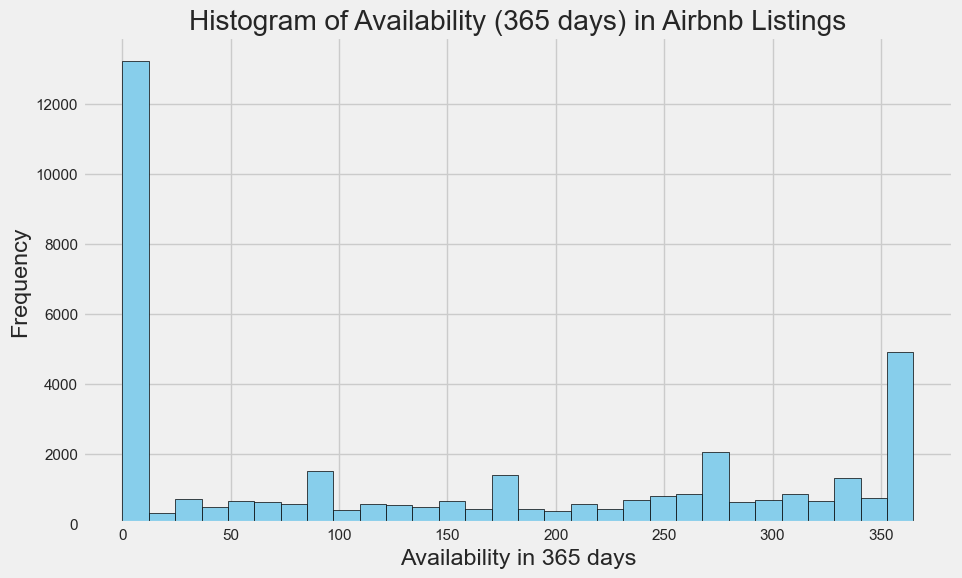

In [28]:
# Plot the histogram for availability_365
plt.figure(figsize=(10, 6))
plt.hist(df['availability_365'], bins=30, edgecolor='black', color='skyblue')

# Add titles and labels
plt.title('Histogram of Availability (365 days) in Airbnb Listings')
plt.xlabel('Availability in 365 days')
plt.ylabel('Frequency')

plt.show()

# Feature Selection – how were the features selected based on the data analysis?


In [5]:
print("Finding top columns.")
#top_columns: List[str] = ColumnSelector.recursive_feature_elimination(x_train, y_train, 20)
top_columns = ['host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'neighbourhood_cleansed', 'property_type', 'accommodates', 'bathrooms', 'bedrooms', 'minimum_nights', 'maximum_minimum_nights', 'minimum_nights_avg_ntm', 'availability_30', 'availability_90', 'review_scores_cleanliness', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'latitude', 'longitude']
print(f"Top columns: {top_columns}")
x_train = x_train[top_columns]
x_val = x_val[top_columns]
x_test = x_test[top_columns]

Finding top columns.
Top columns: ['host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'neighbourhood_cleansed', 'property_type', 'accommodates', 'bathrooms', 'bedrooms', 'minimum_nights', 'maximum_minimum_nights', 'minimum_nights_avg_ntm', 'availability_30', 'availability_90', 'review_scores_cleanliness', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'latitude', 'longitude']


# Modeling – selection, comparison, tuning, and analysis – consider ensembles.



Modeling - What modeling techniques should we apply?



## Histogram Gradient Boosting Algorithm

In [39]:
from tuners.HistGradientBoostingRegressorTuner import HistGradientBoostingRegressorTuner

print("Performing hyperparameter tuning.")
study = optuna.create_study(direction='minimize')
study.optimize(HistGradientBoostingRegressorTuner.tune(x_train, y_train, x_val, y_val), n_trials=10)

print("Training model.")
model = HistGradientBoostingRegressor(**study.best_params, random_state=1)
model.fit(x_train, y_train)

[I 2024-06-08 11:42:14,616] A new study created in memory with name: no-name-fc4c9d24-bf96-4b17-bd27-318ac1284be4


Performing hyperparameter tuning.


[I 2024-06-08 11:42:20,550] Trial 0 finished with value: 54.169089886238886 and parameters: {'learning_rate': 0.15722817860203817, 'max_iter': 231, 'max_depth': 14, 'min_samples_leaf': 2, 'l2_regularization': 0.9511395365365992, 'max_leaf_nodes': 174, 'max_bins': 94, 'early_stopping': False, 'validation_fraction': 0.13592685582426198, 'tol': 0.0007371101461526429}. Best is trial 0 with value: 54.169089886238886.
[I 2024-06-08 11:42:32,786] Trial 1 finished with value: 52.675739469179135 and parameters: {'learning_rate': 0.013639715969634163, 'max_iter': 633, 'max_depth': 15, 'min_samples_leaf': 34, 'l2_regularization': 0.4651821443221462, 'max_leaf_nodes': 254, 'max_bins': 112, 'early_stopping': False, 'validation_fraction': 0.1978621861413501, 'tol': 0.0002845922703861}. Best is trial 1 with value: 52.675739469179135.
[I 2024-06-08 11:42:34,209] Trial 2 finished with value: 55.437870909544664 and parameters: {'learning_rate': 0.06271110957779863, 'max_iter': 884, 'max_depth': 3, 'min_

Training model.


HistGradientBoostingRegressor(early_stopping=False,
                              l2_regularization=0.4651821443221462,
                              learning_rate=0.013639715969634163, max_bins=112,
                              max_depth=15, max_iter=633, max_leaf_nodes=254,
                              min_samples_leaf=34, random_state=1,
                              tol=0.0002845922703861,
                              validation_fraction=0.1978621861413501)

Evaluating model.
{'mse': 2774.7335286248367, 'rmse': 52.675739469179135, 'mae': 36.56553017112799, 'r2': 0.7381100838567753}


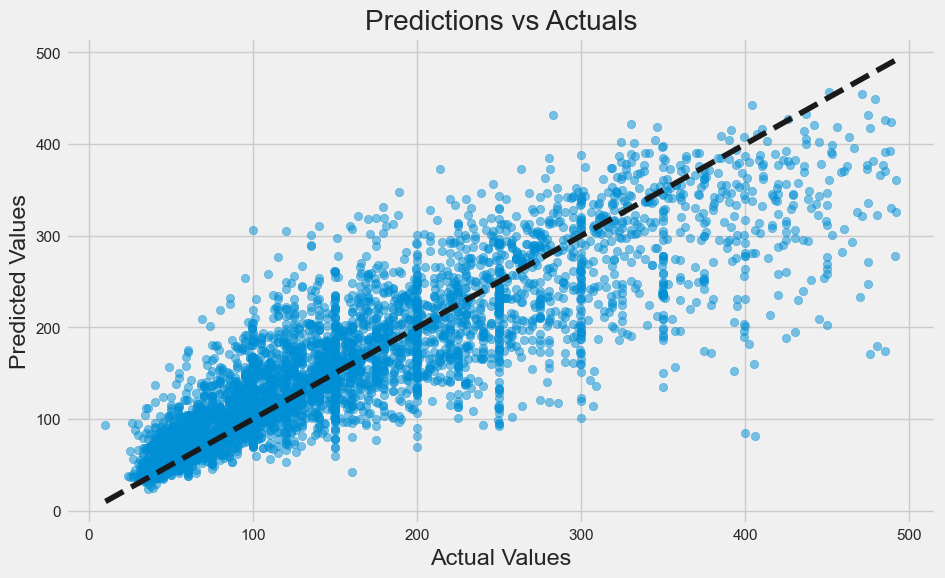

In [40]:
print("Evaluating model.")
val_preds = model.predict(x_val)
print(ModelEvaluator.get_key_metrics(y_val, val_preds))
ModelEvaluator.plot_predictions_vs_actuals(y_val, val_preds)

## Random Forest Regressor

In [15]:
from typing import List
import optuna
import pandas as pd
from sklearn.impute import SimpleImputer
from tqdm import tqdm
from sklearn.ensemble import RandomForestRegressor

class RandomForestRegressorTuner:
    @staticmethod
    def tune(x_train, y_train, x_val, y_val):
        def objective(trial):
            param = {
                'n_estimators': trial.suggest_int('n_estimators', 50, 300),
                'max_depth': trial.suggest_int('max_depth', 3, 20),
                'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
                'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
            }
            model = RandomForestRegressor(**param, random_state=0)
            model.fit(x_train, y_train)
            preds = model.predict(x_val)
            loss = ((preds - y_val) ** 2).mean()  # Mean squared error
            return loss
        
        return objective

# Progress bar for hyperparameter tuning
print("Performing hyperparameter tuning.")
n_trials = 5
study = optuna.create_study(direction='minimize')

for _ in tqdm(range(n_trials), desc="Hyperparameter Tuning Progress"):
    study.optimize(RandomForestRegressorTuner.tune(x_train, y_train, x_val, y_val), n_trials=1)

print("Training model.")
model = RandomForestRegressor(**study.best_params, random_state=1)

# Progress bar for model training
for _ in tqdm(range(1), desc="Model Training Progress"):
    model.fit(x_train, y_train)


[I 2024-06-08 06:14:10,993] A new study created in memory with name: no-name-da7118ac-2677-4e4b-9a68-5585ed9bba2c


Performing hyperparameter tuning.


Hyperparameter Tuning Progress: 100%|█████████████| 5/5 [00:21<00:00,  4.30s/it]


Training model.


Model Training Progress: 100%|████████████████████| 1/1 [00:05<00:00,  5.56s/it]


Evaluating model.
{'mse': 3059.441761446344, 'rmse': 55.31222072423366, 'mae': 38.31182024980446, 'r2': 0.7112382367227323}


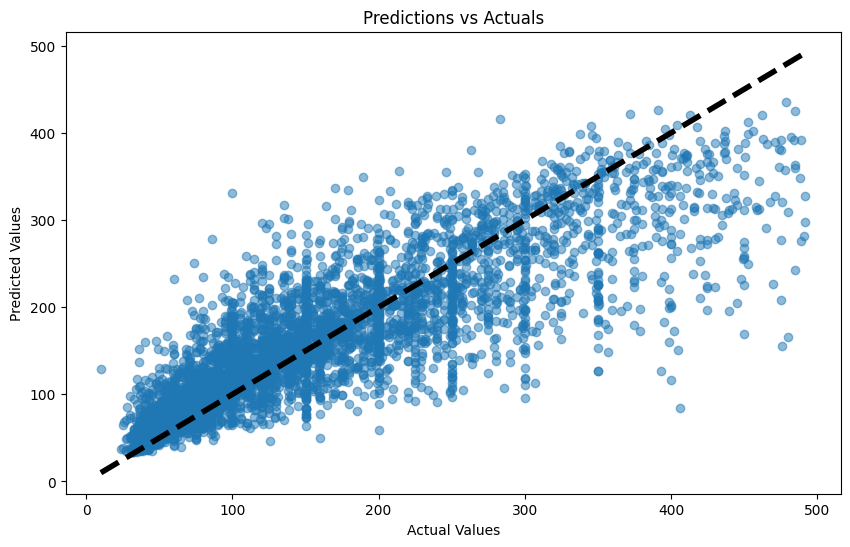

In [17]:
print("Evaluating model.")
val_preds = model.predict(x_val)
print(ModelEvaluator.get_key_metrics(y_val, val_preds))
ModelEvaluator.plot_predictions_vs_actuals(y_val, val_preds)

## Gradient Boosting Regressor Algorithm

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
import optuna
from tqdm import tqdm

class GradientBoostingRegressorTuner:
    @staticmethod
    def tune(x_train, y_train, x_val, y_val):
        def objective(trial):
            param = {
                'n_estimators': trial.suggest_int('n_estimators', 50, 300),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
                'max_depth': trial.suggest_int('max_depth', 3, 10),
                'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
                'subsample': trial.suggest_float('subsample', 0.5, 1.0),
                'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2', None])
            }
            model = GradientBoostingRegressor(**param, random_state=0)
            model.fit(x_train, y_train)
            preds = model.predict(x_val)
            loss = ((preds - y_val) ** 2).mean()  # Mean squared error
            return loss
        
        return objective

# Progress bar for hyperparameter tuning
print("Performing hyperparameter tuning.")
n_trials = 1
study = optuna.create_study(direction='minimize')

for _ in tqdm(range(n_trials), desc="Hyperparameter Tuning Progress"):
    study.optimize(GradientBoostingRegressorTuner.tune(x_train, y_train, x_val, y_val), n_trials=1)

print("Training model.")
model = GradientBoostingRegressor(**study.best_params)

# Progress bar for model training
for _ in tqdm(range(1), desc="Model Training Progress"):
    model.fit(x_train, y_train)

[I 2024-06-08 09:47:41,500] A new study created in memory with name: no-name-3babb96d-ee2d-4871-a9e4-4e77f4cd6140


Performing hyperparameter tuning.


Hyperparameter Tuning Progress: 100%|█████████████| 1/1 [00:11<00:00, 11.17s/it]


Training model.


Model Training Progress: 100%|████████████████████| 1/1 [00:11<00:00, 11.12s/it]


Evaluating model.
{'mse': 2910.3219874509655, 'rmse': 53.94740019176981, 'mae': 37.95254121753291, 'r2': 0.7253127288150599}


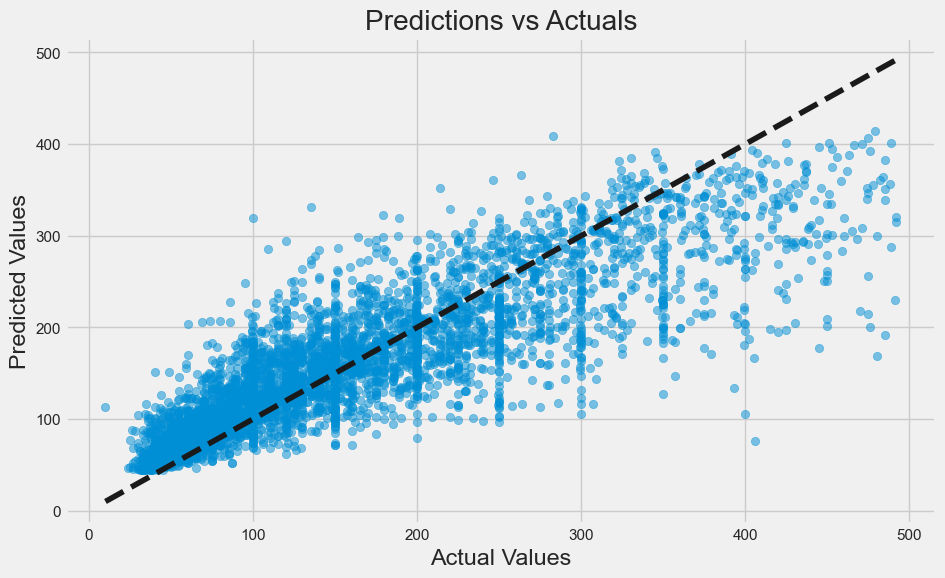

In [36]:
print("Evaluating model.")
val_preds = model.predict(x_val)
print(ModelEvaluator.get_key_metrics(y_val, val_preds))
ModelEvaluator.plot_predictions_vs_actuals(y_val, val_preds)

## Extreme Gradient Boosting Regressor Algorithm

In [37]:
from xgboost import XGBRegressor

class XGBRegressorTuner:
    @staticmethod
    def tune(x_train, y_train, x_val, y_val):
        def objective(trial):
            param = {
                'n_estimators': trial.suggest_int('n_estimators', 50, 300),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
                'max_depth': trial.suggest_int('max_depth', 3, 10),
                'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
                'gamma': trial.suggest_float('gamma', 0.0, 0.5),
                'subsample': trial.suggest_float('subsample', 0.5, 1.0),
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
                'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
                'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0)
            }
            model = XGBRegressor(**param, random_state=0)
            model.fit(x_train, y_train)
            preds = model.predict(x_val)
            loss = ((preds - y_val) ** 2).mean()  # Mean squared error
            return loss
        
        return objective

# Progress bar for hyperparameter tuning
print("Performing hyperparameter tuning.")
n_trials = 1  # Increase the number of trials for better optimization
study = optuna.create_study(direction='minimize')

for _ in tqdm(range(n_trials), desc="Hyperparameter Tuning Progress"):
    study.optimize(XGBRegressorTuner.tune(x_train, y_train, x_val, y_val), n_trials=1)

print("Training model.")
model = XGBRegressor(**study.best_params, random_state=1)

# Progress bar for model training
for _ in tqdm(range(1), desc="Model Training Progress"):
    model.fit(x_train, y_train)


[I 2024-06-08 09:58:45,396] A new study created in memory with name: no-name-3f9d58a8-2c58-40e5-9adc-16010bc981b9


Performing hyperparameter tuning.


Hyperparameter Tuning Progress: 100%|█████████████| 1/1 [00:00<00:00,  2.39it/s]


Training model.


Model Training Progress: 100%|████████████████████| 1/1 [00:00<00:00,  2.13it/s]


Evaluating model.
{'mse': 3053.4707470499206, 'rmse': 55.25821881901298, 'mae': 38.591289890830865, 'r2': 0.7118018037980703}


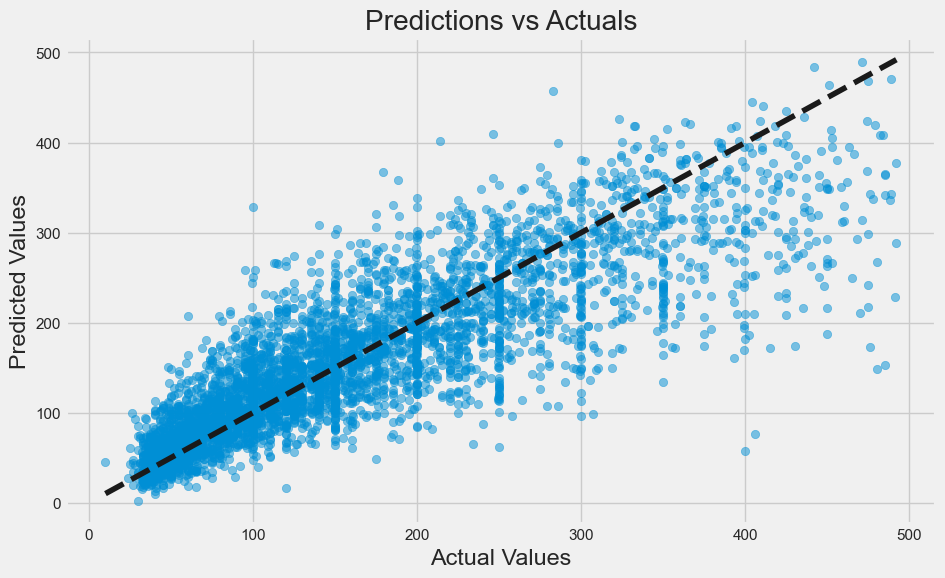

In [38]:
print("Evaluating model.")
val_preds = model.predict(x_val)
print(ModelEvaluator.get_key_metrics(y_val, val_preds))
ModelEvaluator.plot_predictions_vs_actuals(y_val, val_preds)

# Evaluation – performance measures, results, and conclusions.


Evaluation - Which model best meets the business objectives?

The R^2 scores for the algorithms used are as follows:
1. **Histogram Gradient Boosting Algorithm**: 0.738
2. **Random Forest Regressor**: 0.711
4. **Gradient Boosting Regressor Algorithm**: 0.725
5. **Extreme Gradient Boosting Regressor Algorithm**: 0.711

Based on the above Histogram Gradient Boosting Algorithm is giving the highest score. However, none of the algorithms have been run with a high number of trials, which can give a different result.

# Discussion and conclusions – address the problem statement and recommendation.

Deployment - How to get the model in production and ensure it works?

# References and Sources

GitHub link: https://github.com/suvoganguli/AAI510_FinalProject

